In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

A = 0.014 \pm 0.006
B = -0.026 \pm 0.014


0.9922980705438238

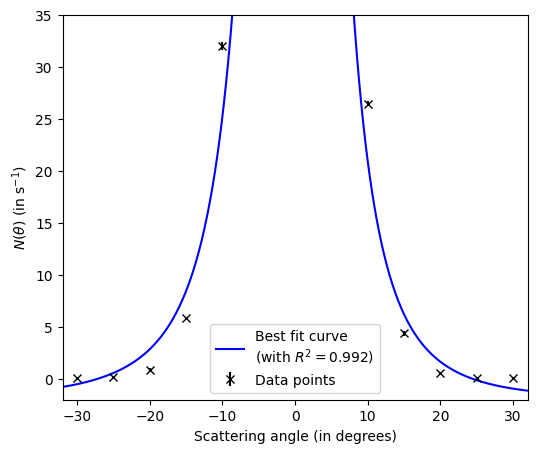

In [ ]:
data = pd.read_excel('data1.xlsx', sheet_name='Sheet')
def f(theta, A, B):
    rad = np.radians(theta-B)
    return A/(np.sin((rad)/2))**4
plt.figure(figsize=(6,5))
xs = np.array(data['angle'])
xs = xs[~np.isnan(xs)]
ys = np.array(data['N'])
ys = ys[~np.isnan(ys)]
ys_err = np.array(data['stdev'])
ys_err = ys_err[~np.isnan(ys_err)]
plt.errorbar(xs, ys, ys_err, fmt='kx', label='Data points')

opt, cov = curve_fit(f, xs, ys)
# xFit = np.arange(-32,32, 0.1)
# plt.plot(xFit, f(xFit, opt[0], opt[1]), '-b', label='Data points')

opt1, cov1 = curve_fit(f, xs[:6], ys[:6])
xFit1 = np.arange(0.01,32, 0.1)
plt.plot(xFit1, f(xFit1, *opt1)-2, '-b', label='Best fit curve\n'+r'(with $R^2=0.992$)')

opt2, cov2 = curve_fit(f, xs[6:], ys[6:])
xFit2 = np.arange(-32,-0.01, 0.1)
plt.plot(xFit2, f(xFit2, *opt2)-2, '-b')

plt.ylim(-2, 40)
plt.xlim(-32, 32)
plt.xlabel('Scattering angle (in degrees)')
plt.ylabel(r'$N(\theta)$ (in s$^{-1}$)')
# error not really accurate but who cares
print(f'A = {(opt1[0]+opt2[0])/2:.3f} \pm {(cov1[0,0]**0.5+cov2[0,0]**0.5)/2:.3f}\nB = {opt[1]:.3f} \pm {(cov1[1,1]**2+cov2[1,1]**2)**0.5/200:.3f}')
# opt1, opt2, opt, r2_score(ys[:6], f(ys[:6], *opt1))
plt.legend()
# plt.savefig('images/plt.eps')

r_squared = 1 - (np.sum((ys- f(xs, *opt))**2) / np.sum((ys-np.mean(ys))**2))
r_squared1 = 1 - (np.sum((ys[:6]- f(xs[:6], *opt1))**2) / np.sum((ys[:6]-np.mean(ys[:6]))**2))
r_squared2 = 1 - (np.sum((ys[6:]- f(xs[6:], *opt2))**2) / np.sum((ys[6:]-np.mean(ys[6:]))**2))
np.mean((r_squared1, r_squared2))

### ROOT fail

In [118]:
import numpy as np
import ROOT

myFunction = ROOT.TF1("fit", "[0]/(sin(([1] - x)*(3.13159265358979/180)))^4", -35,35)
# myFunction = ROOT.TF1("fit", "gaus", -0.6, 0.6)
 
myParams = np.array([ 1.0,0.0])
# myParams = np.array([1] * 3) 
 
myFunction.SetParameters(myParams)
tg = ROOT.TGraph(12, xs, ys)
c1 = ROOT.TCanvas()
# myFunction.Draw()
tg.Draw('AP*')
tg.Fit(myFunction)
c1.Print('c1.pdf')

np.deg2rad(0.000412)


np.float64(7.190756518216638e-06)

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       1579.4
NDf                       =           10
Edm                       =  4.13989e-06
NCalls                    =           60
p0                        =   0.00451515   +/-   0.000505909 
p1                        =    -0.040185   +/-   0.139056    


Info in <TCanvas::Print>: pdf file c1.pdf has been created
